# Import & Installation

tshark is the terminal version of Wireshark (apt-get because is a system library)

pyshark is a library that let python use tshark (pip because is a python library)


In [ ]:
!apt-get install tshark
!pip install pyshark
!pip install requests

import matplotlib.pyplot as plt
import seaborn as sns
import os
import nest_asyncio
import pyshark
import pandas as pd
import numpy as np
import itertools
import requests

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13
  wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader geoipupdate geoip-database geoip-database-extra libjs-leaflet
  libjs-leaflet.markercluster wireshark-doc
The following NEW packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13 tshark
  wireshark-common
0 upgraded, 16 newly installed, 0 to remove and 49 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmaxmindd

# Capture file selection and reading

For each device, I record eight combinations of conditions that have been described in the project report and all of these are available into two versions:

  * **Not filtered**: the file contains the original and unaltered Wireshark capture.
  * **Filtered**: the file contains only the probe requests captured in the not filtered version of the capture. This filtering process was performed through the Wireshark tool leveraging on the "File > Export Specified Packets..." option.

All these files are available into two different formats: pcap and pcapng.

In [ ]:
nest_asyncio.apply()

# specify the mode number of interest
mode_nr = '01'
# specify the version of the files (if more than one is available)
version = '01'

# FILTERED FILES
# To save some time in the frame analysis, I suggest to use the filtered files that contains only probe requests
file_name = '/Samsung/Filtered/' + mode_nr +'_SamsungA53_' + version + '_filtered.pcapng'
#file_name = '/iPad/Filtered/' + mode_nr +'_iPadApple_' + version + '_filtered.pcapng'
#file_name = '/Huawei/Filtered/' + mode_nr +'_HuaweiTablet_' + version + '_filtered.pcapng'

# NOT FILTERED FILES (require more time to be read)
# The following ones are the raw files: they contain all packets captured in Wireshark
#file_name = '/Samsung/' + mode_nr +'_SamsungA53_' + version + '.pcapng'
#file_name = '/iPad/' + mode_nr +'_iPadApple_' + version + '.pcapng'
#file_name = '/Huawei/' + mode_nr +'_HuaweiTablet_' + version + '.pcapng'

capture = pyshark.FileCapture('/content/drive/MyDrive/WiresharkCaptures/' + file_name)

Each frame of the capture file is structured into 4 layers:

* RADIOTAP layer
* WLAN_RADIO layer
* WLAN layer
* WLAN.MGT layer

We can prove this by using the following command on a generic captured frame:

In [ ]:
capture[0].layers

[<RADIOTAP Layer>, <WLAN_RADIO Layer>, <WLAN Layer>, <WLAN.MGT Layer>]

We can access each one of them by means of the command:

```
# .get_multiple_layers("LAYER_NAME")

```
Where LAYER_NAME can be:

  * radiotap
  * wlan_radio
  * wlan
  * wlan.mgt

Below a print of a wlan layer frame:

In [ ]:
print(capture[0].get_multiple_layers("wlan")[0])

Layer WLAN
:	Type/Subtype: Probe Request (0x0004)
	Frame Control Field: 0x4000
	.... ..00 = Version: 0
	.... 00.. = Type: Management frame (0)
	0100 .... = Subtype: 4
	Flags: 0x00
	.... ..00 = DS status: Not leaving DS or network is operating in AD-HOC mode (To DS: 0 From DS: 0) (0x0)
	.... .0.. = More Fragments: This is the last fragment
	.... 0... = Retry: Frame is not being retransmitted
	...0 .... = PWR MGT: STA will stay up
	..0. .... = More Data: No data buffered
	.0.. .... = Protected flag: Data is not protected
	0... .... = +HTC/Order flag: Not strictly ordered
	.000 0000 0000 0000 = Duration: 0 microseconds
	Receiver address: ff:ff:ff:ff:ff:ff
	Destination address: ff:ff:ff:ff:ff:ff
	Transmitter address: b8:4d:43:9c:b1:63
	Source address: b8:4d:43:9c:b1:63
	BSS Id: ff:ff:ff:ff:ff:ff
	.... .... .... 0000 = Fragment number: 0
	0100 1001 1011 .... = Sequence number: 1179
	Frame check sequence: 0xbb17dade [unverified]
	FCS Status: Unverified



How did I find the correct field to access?

By means of the **dir()** function, here are listed all the (for this instance) WLAN layer fields that we can access.

In [ ]:
dir(capture[0].get_multiple_layers("wlan")[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_all_fields',
 '_field_prefix',
 '_get_all_field_lines',
 '_get_all_fields_with_alternates',
 '_get_field_or_layer_repr',
 '_get_field_repr',
 '_layer_name',
 '_pretty_print_layer_fields',
 '_sanitize_field_name',
 'addr',
 'addr_resolved',
 'bssid',
 'bssid_resolved',
 'da',
 'da_resolved',
 'duration',
 'fc',
 'fc_ds',
 'fc_frag',
 'fc_fromds',
 'fc_moredata',
 'fc_order',
 'fc_protected',
 'fc_pwrmgt',
 'fc_retry',
 'fc_subtype',
 'fc_tods',
 'fc_type',
 'fc_type_subtype',
 'fc_version',
 'fcs',
 'fcs_status',
 'field_names',
 'flags',
 'frag',
 'get',
 'get_field',
 'get_field_by_sh

# Frame Validity check

In order to consider a frame "VALID", we must be able to recover all the informations that we're interested in, which are:


*   Type and subtype
*   Timestamp
*   Source address
*   RSSI
*   SSID



In [ ]:
TIMESTAMP = []
SA = [] # Source Address List: one addr. for each received frame
SSID = [] # WiFi Network name
RSSI = [] # Received Signal Strenght: how loud the sniffer was able to received the frame
          # RSS is a physcal quantity that tells you something about the DISTANCE between RX and TX
          # If you have multiple RXs -> you can perform triangulation
TYPE_SUBTYPE = [] # Type and Subtype of a frame

frameCounter = 0

for frame in capture:
  success = False # in order to deal with malformed packets: are we able to access the data we are interested in?
  frameCounter = frameCounter + 1

  try:
    # timestamp
    timestamp = frame.sniff_timestamp

    #-------------------------------
    # LAYER 0: RADIOTAP
    radiotap = frame.get_multiple_layers("radiotap")[0]

    #-------------------------------
    # LAYER 1: WLAN_RADIO
    wlan_radio = frame.get_multiple_layers("wlan_radio")[0]

    rssi = wlan_radio.signal_dbm # RSSI

    #-------------------------------
    # LAYER 2: WLAN
    wlan = frame.get_multiple_layers("wlan")[0]

    sa = wlan.sa # source address
    type_subtype = wlan.fc_type_subtype # type + subtype

    #-------------------------------
    # LAYER 3: WLAN.MGT
    wlanmgt = frame.get_multiple_layers("wlan.mgt")[0]

    ssid = wlanmgt.wlan_ssid # SSID

    #-------------------------------
    if (type_subtype == '0x0004'): # always true if analysing the filtered version of a capture file
      success = True

  except:
    success = False

  if(success):
    TIMESTAMP.append(timestamp)
    SA.append(sa)
    SSID.append(ssid)
    RSSI.append(rssi)

# the following two counters should be:
#   - equal: when used the filtered version of a file
#   - different: when used the not filtered version of a file
print("Total frames captured: ", str(frameCounter))
print("Valid probe requests: ", str(len(TIMESTAMP)))

Total frames captured:  242
Valid probe requests:  242


# Probes filtering according to RSSI

Starting from the previous separated lists (SA, TIMESTAMP, RSSI, SSID), I define a single dataframe, sorted according to the order: Source Address, RSSI and Timestamp.

In [ ]:
df_capture = pd.DataFrame(list(zip(SA, RSSI, TIMESTAMP, SSID)), columns = ['Source Address', 'RSSI', 'Timestamp', 'SSID'])

In [ ]:
df_capture.sort_values(['Source Address', 'RSSI', 'Timestamp'], ascending=[True, True, True], inplace=True, ignore_index=True)

In order to highlight the results obtained through this new filter it possibile to execute one of the two next commands:

1.   **Not using the filter**

In [ ]:
#df_capture_filtered = df_capture.copy()

2. **Using the filter**

  I verified that Android devices emit a burst of Probe Requests characterized by different emitted powers and so received with different quality levels (= RSSI) instead Ios devices are characterized by a more stable emitted power.

  Considering in particular the Android devices behaviour, the filter is able to keep all the frames that belong to a burst in which at least one packet has a RSSI value greater than -40 dbm (threshold suggested by the paper "A dataset of labelled device Wi-Fi probe requests for MAC address de-randomization" by Lucia Pintor and Luigi Atzori).

In [ ]:
df_capture_filtered = pd.DataFrame()
prev_source_addr = ''
to_be_appended = False
threshold = -40

for i in range(len(df_capture)):

  # the first frame of a new source address is the one with higher RSSI value, so it is the most important one to examine
  if (str(df_capture.loc[i]['Source Address']) != prev_source_addr): # new source address to examine
    # updating seen source address
    prev_source_addr = df_capture.loc[i]['Source Address']

    to_be_appended = False

    # comparing the RSSI value with respect to the threshold (= -40 dbm)
    if (int(df_capture.loc[i]['RSSI']) > threshold):
      # all the frames coming from the same source must be kept
      to_be_appended = True

      # insert the first frame coming from the new source address into the new dataframe
      df_capture_filtered = pd.concat([df_capture_filtered, pd.DataFrame([df_capture.loc[i]])], ignore_index=True)


  else: # source address already seen (I should already know if I have to keep it or not through the to_be_appended boolean variable)
    if (to_be_appended):
      df_capture_filtered = pd.concat([df_capture_filtered, pd.DataFrame([df_capture.loc[i]])], ignore_index=True)

The following plot represents the number of probe requests (= burst size) coming from each registered source address.

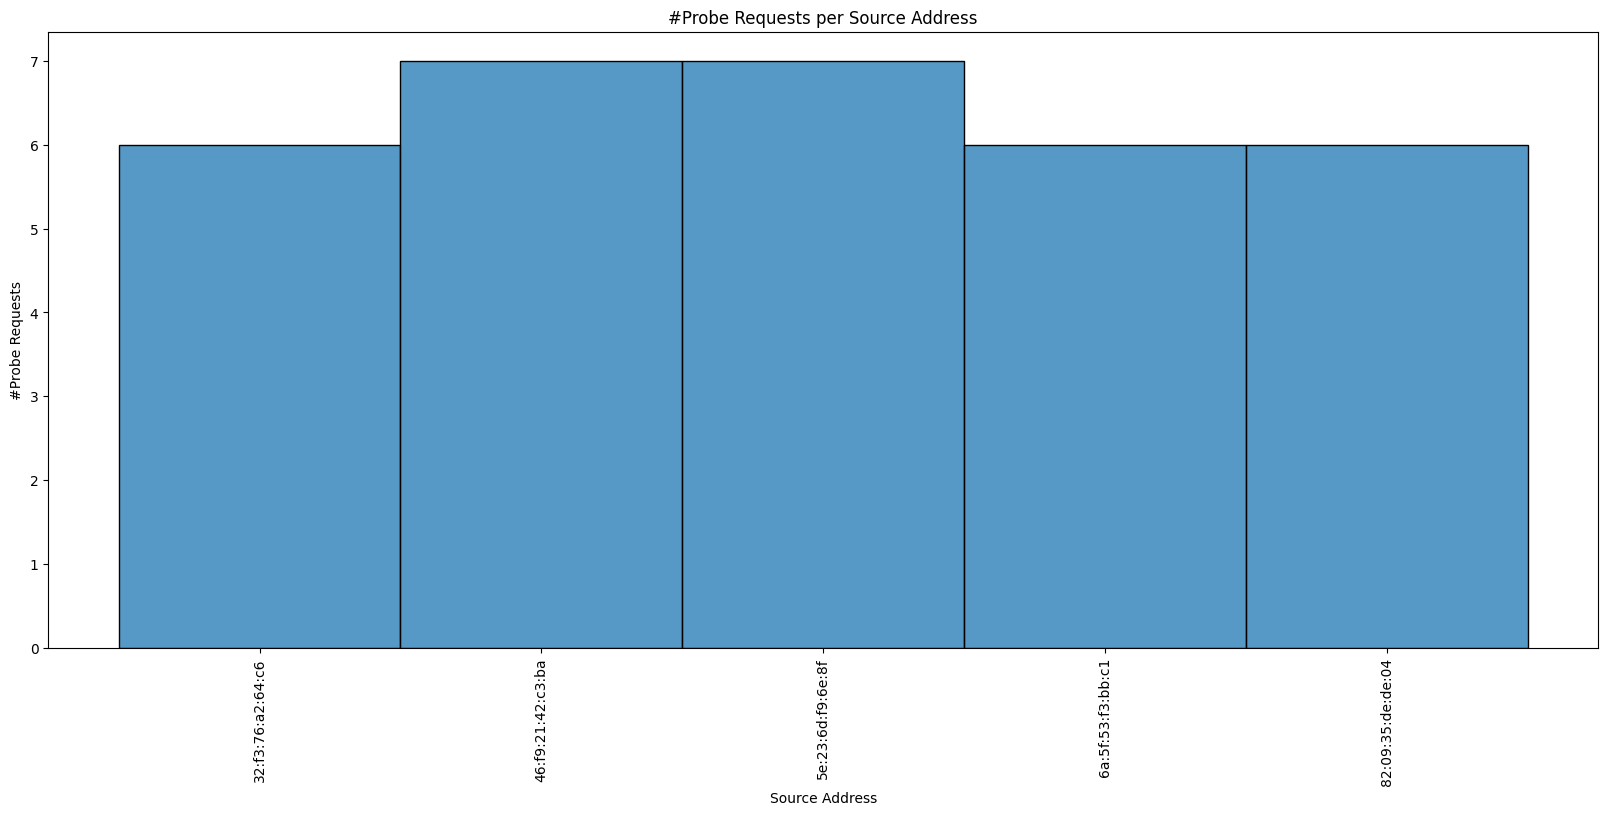

In [ ]:
plt.figure(figsize=(20, 8))

sns.histplot(data=df_capture_filtered, x='Source Address')

plt.xticks(rotation=90)

plt.xlabel('Source Address')
plt.ylabel('#Probe Requests')
plt.title('#Probe Requests per Source Address')

plt.show()

So the average number of probe requests coming from a source address is:

In [ ]:
unique_sa = np.unique(df_capture_filtered['Source Address'])
print('Average probe requests coming from a source address: ', len(df_capture_filtered)/len(unique_sa))

Average probe requests coming from a source address:  6.4


This next plot instead represents the RSSI value of each probe request belonging to the same burst/source address.

Depending on the filtering or not filtering choice, it is possible to see two different behaviours:

1. **not filtered**

  Some burst of probe requests have no frames with RSSI value greater than -40 dbm (this subset of bursts will be the one deleted/neglected in the **filtered** version)

2. **filtered**

  All the burst of probe requests have at least one frame with RSSI value greater than -40 dbm

A **green** horizontal line is highlighting those probe requests that are "saving" the entire burst.

A **red** horizontal line is highlighting those probe requests that are not contributing in "saving" the burst of messages.

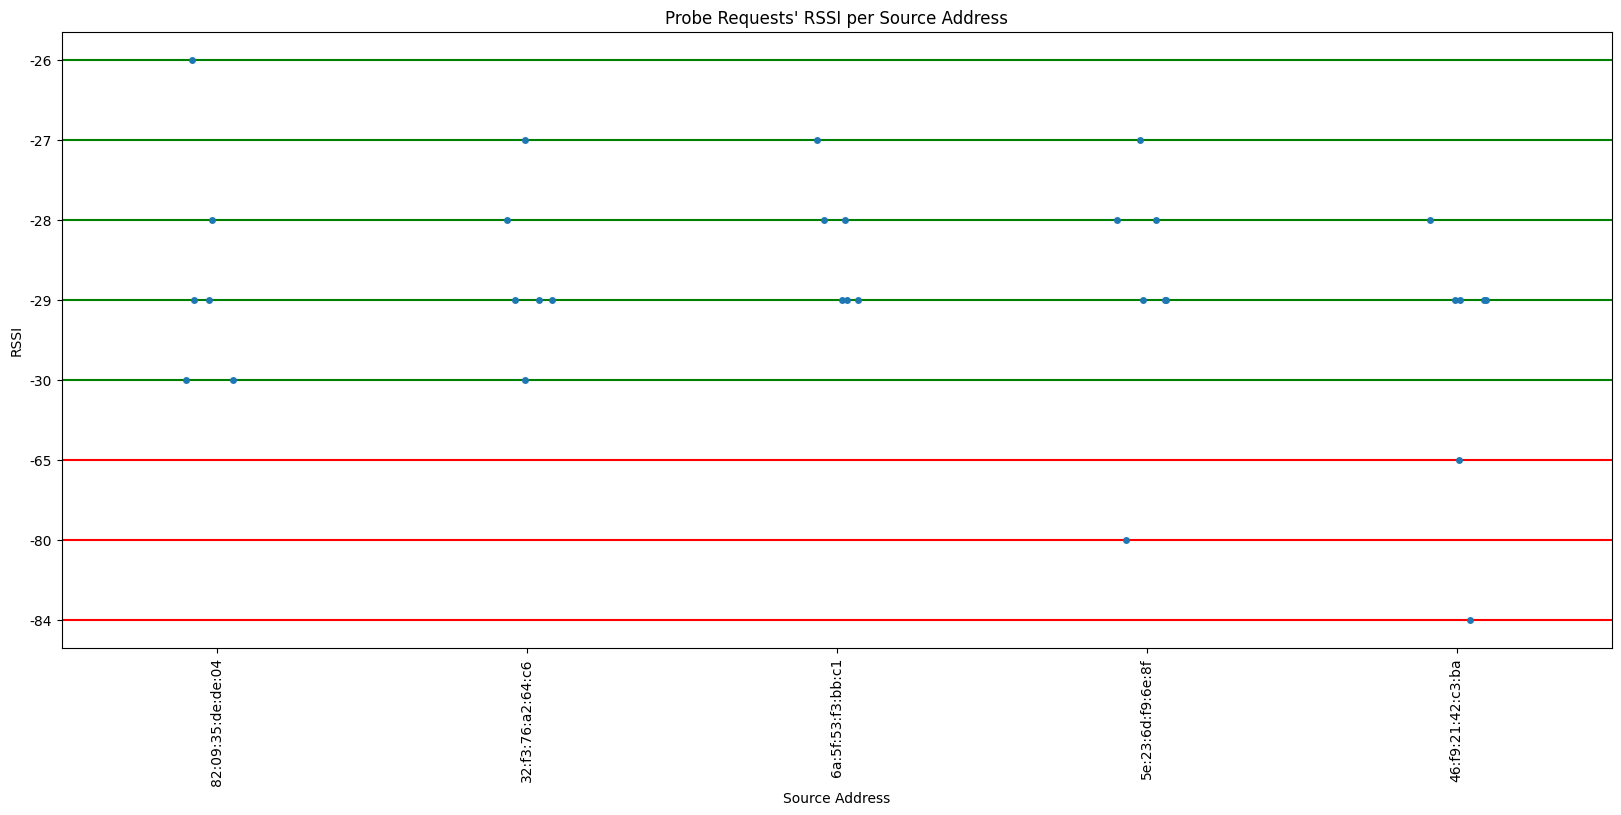

In [ ]:
plt.figure(figsize=(20, 8))

plot = sns.stripplot(data=df_capture_filtered.sort_values(['RSSI']), x='Source Address', y='RSSI')

RSSI_values = np.unique(df_capture_filtered['RSSI'])

for i in range(RSSI_values.size):
  # -40 is the threshold
  if (int(RSSI_values[i]) < -40):
    plot.axhline(i, color='r')
  else:
    plot.axhline(i, color='g')

plt.xticks(rotation=90)
plt.xlabel('Source Address')
plt.ylabel('RSSI')
plt.title('Probe Requests\' RSSI per Source Address')

plt.show()

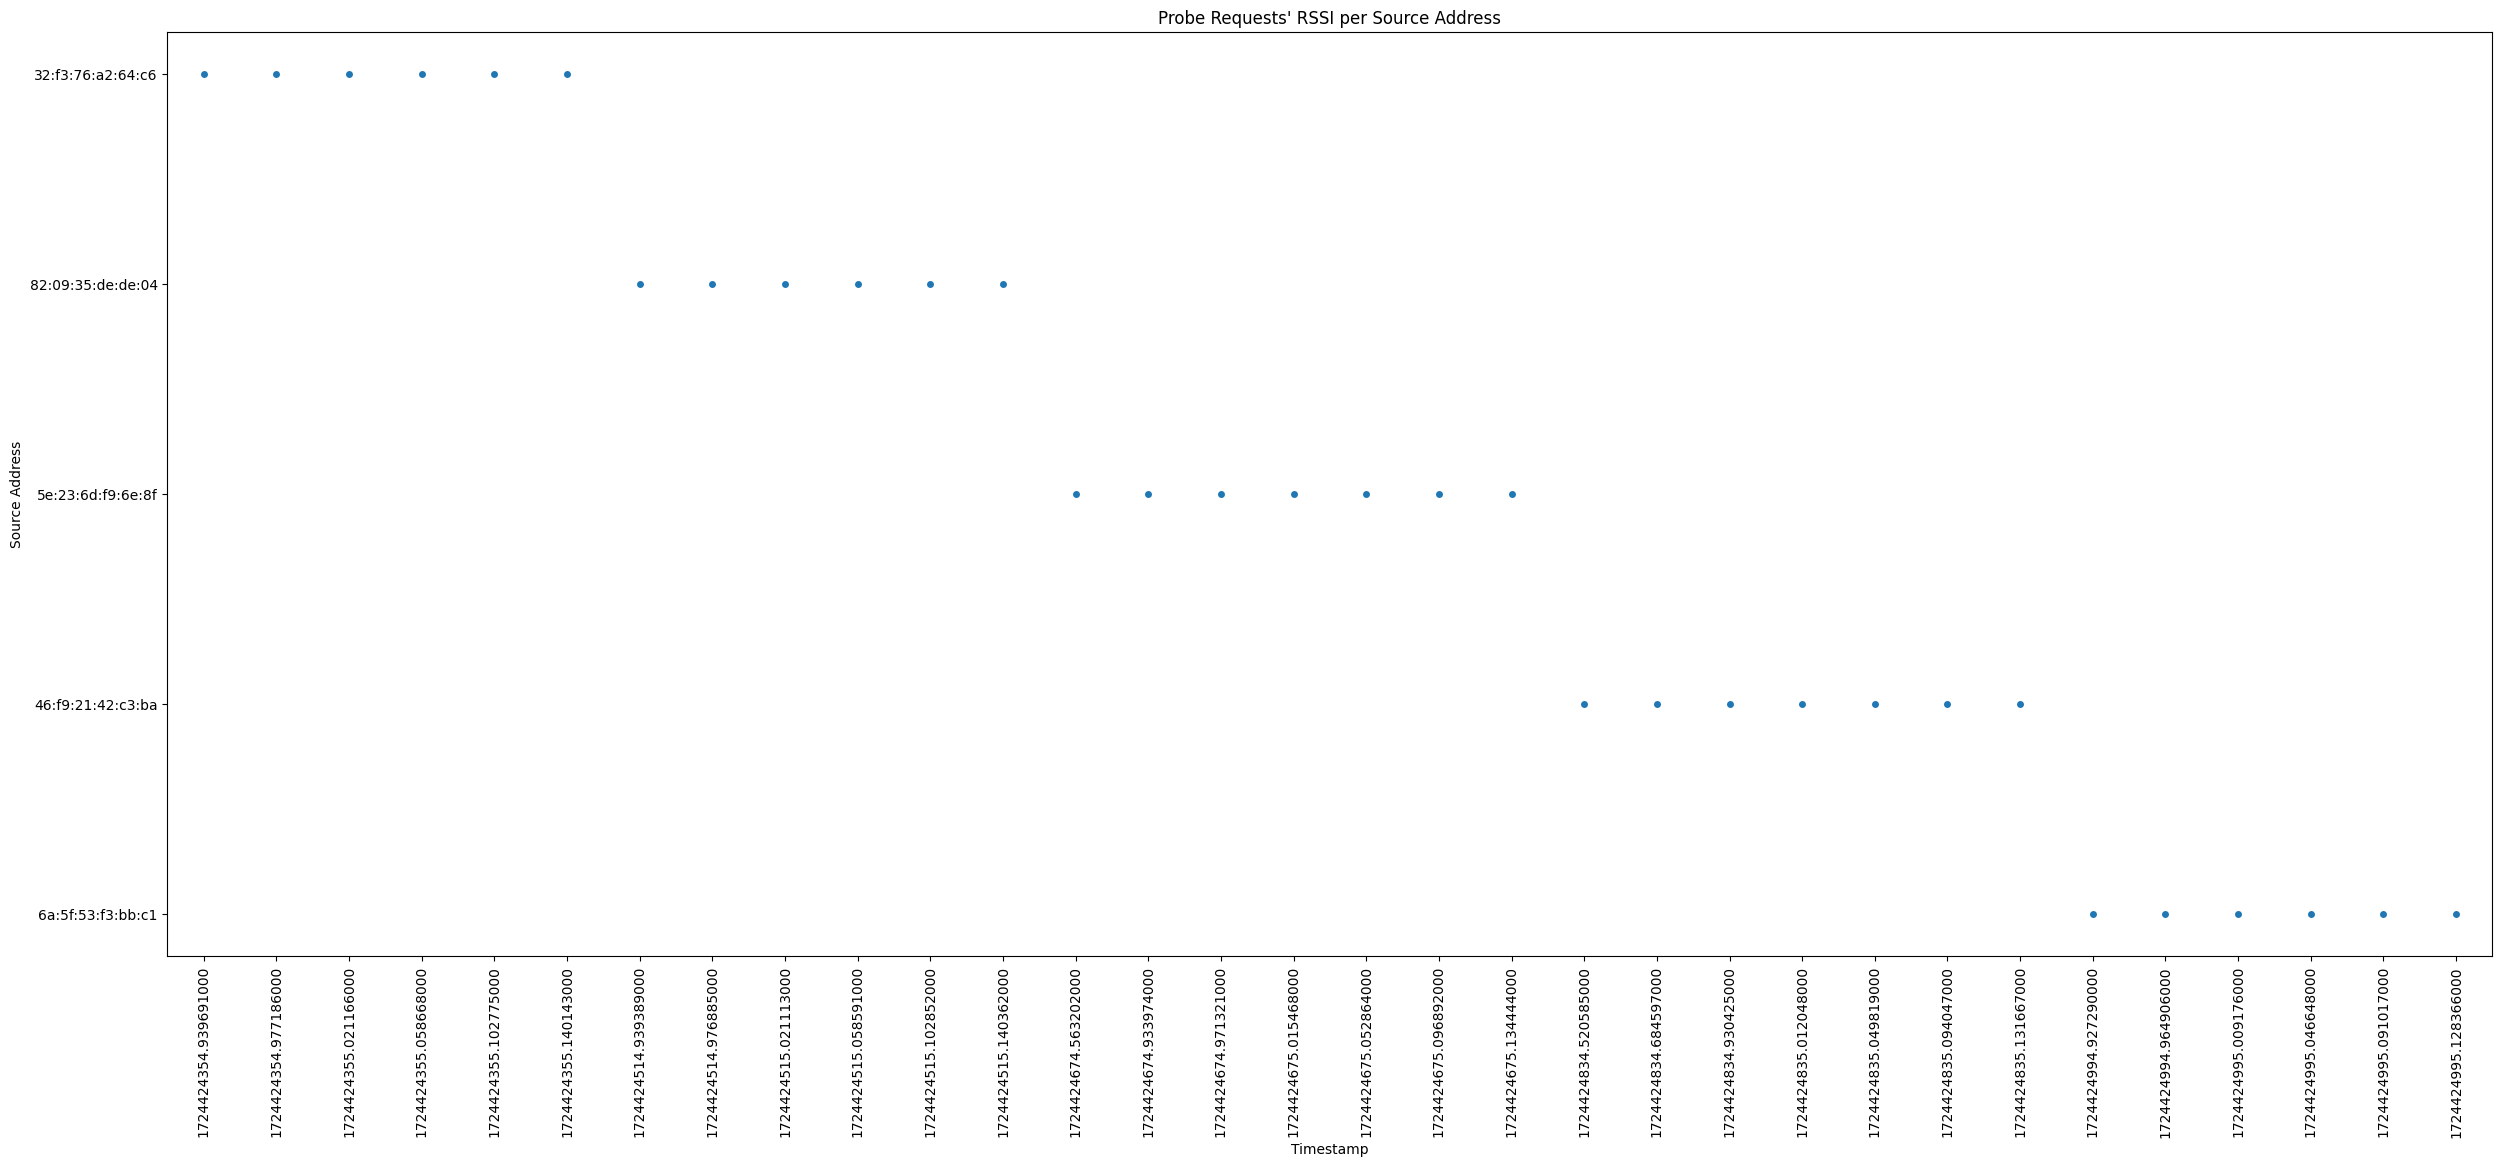

In [ ]:
plt.figure(figsize=(30, 12))

plot = sns.stripplot(data=df_capture_filtered.sort_values(['Timestamp']), x='Timestamp', y='Source Address')

plt.xticks(rotation=90)
plt.xlabel('Timestamp')
plt.ylabel('Source Address')
plt.title('Probe Requests\' RSSI per Source Address')

plt.show()

The following plot highlight the distribution of the RSSI across all the Probe Request frames.

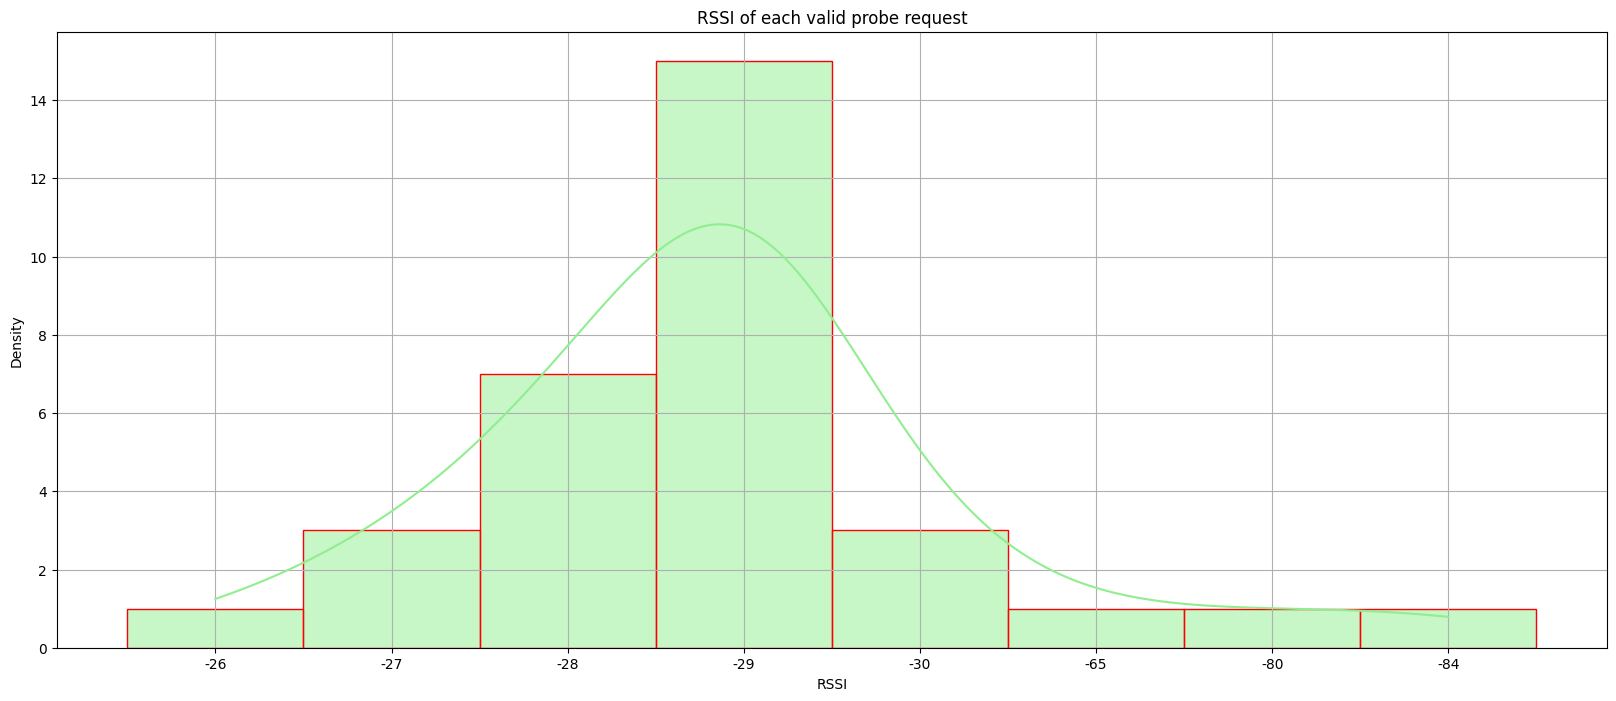

In [ ]:
plt.figure(figsize=(20, 8))

sns.histplot(df_capture_filtered.sort_values(['RSSI'])['RSSI'], kde=True, color='lightgreen', edgecolor='red')

plt.xlabel('RSSI')
plt.ylabel('Density')
plt.grid(visible=True);
plt.title('RSSI of each valid probe request')

plt.show()

It is possible to verify the effects of the RSSI filter by looking at the next code cell (the two numbers differ only if the filter was applied).

In [ ]:
print('Number of frames in the original capture: ', str(len(df_capture)))
print('Number of frames in the filtered (based on RSSI) version of the dataset: ', str(len(df_capture_filtered)))

Number of frames in the original capture:  242
Number of frames in the filtered (based on RSSI) version of the dataset:  32


# Vendors representation

Starting from a MAC address, it is possible to extract the vendor by looking at the first half of it which is also named OUI (= Organizationally Unique Identifier).

> An organizationally unique identifier (OUI) is a 24-bit number that uniquely identifies a vendor, manufacturer, or other organization. OUIs are purchased from the Institute of Electrical and Electronics Engineers (IEEE) Registration Authority by the assignee (IEEE term for the vendor, manufacturer, or other organization).

Before obtaining the final result, I need to perform some steps:

1. How many unique source addresses are there in the dataset?

In [ ]:
print('There were '+ str(len(unique_sa)) + ' unique source MAC addresses')

There were 5 unique source MAC addresses


In [ ]:
unique_sa

array(['32:f3:76:a2:64:c6', '46:f9:21:42:c3:ba', '5e:23:6d:f9:6e:8f',
       '6a:5f:53:f3:bb:c1', '82:09:35:de:de:04'], dtype=object)

In order to obtain the vendor name starting from the vendor oui, I have found an online application called "MACLookup" (https://maclookup.app/) which also provide a REST API.

It has the following **rate limits**:

* Requests per seconds: 	50

* Requests day 	1.000.000 	The day is reset after midnight GMT+0.

* Max API Keys 	10

In [ ]:
# stores the first three octets of a MAC address
VENDORS_OUI = []
# stores the vendors name
VENDORS_NAME = []
# for each vendor, I store also the total number of frames
NR_FRAMES_PER_VENDOR = []
# key for using the API
APIKey = 'api-key'

# given a MAC address (AA:BB:CC:DD:EE:FF), I take only the first three octets which is its OUI (AA:BB:CC)
for i in df_capture_filtered['Source Address']:
  VENDORS_OUI.append(i[:8])

# I perform only one API GET request per vendor: no duplicates!
unique_vendors = np.unique(VENDORS_OUI)

# for each vendor
for i in unique_vendors:
  # ---- GET REQUEST ----
  url_api = 'https://api.maclookup.app/v2/macs/' + i + '/company/name?apiKey=' + APIKey
  response = requests.get(url_api).text # in response I store the vendor name
  # ---------------------

  # first time seeing a vendor name
  if response not in VENDORS_NAME:
    # inserting it into the VENDORS_NAME list
    VENDORS_NAME.append(response)
    # since it's the first time I see this vendor name, I simply insert the number of frames (= # duplicates of a given OUI in VENDORS_OUI list)
    NR_FRAMES_PER_VENDOR.append(VENDORS_OUI.count(i))
  # already seen (I need to update something I already inserted)
  else:
    # identify the correct index
    vendor_name_location = VENDORS_NAME.index(response)
    # update the count/value
    NR_FRAMES_PER_VENDOR[vendor_name_location] += VENDORS_OUI.count(i)

In [ ]:
# Checking if everything is correct
total = 0
for i in range(len(NR_FRAMES_PER_VENDOR)):
  total += NR_FRAMES_PER_VENDOR[i]
print("Total frames: ", total) # this should be equal to the total number of frames

Total frames:  32


For the following plot, it's interesting to analyse the differences between the filtered and non filtered versions of the dataset.

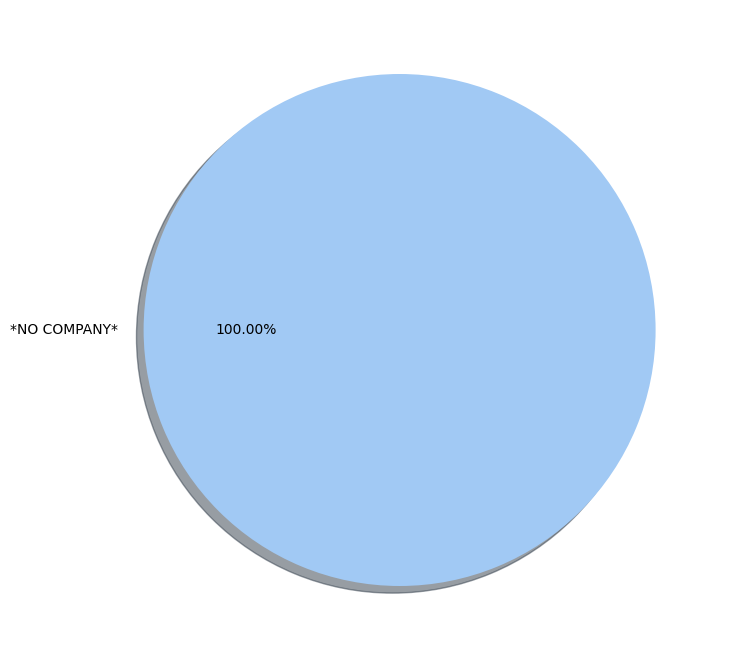

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
pasd = plt.figure(figsize=(8,8));
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie(NR_FRAMES_PER_VENDOR, labels = VENDORS_NAME, colors = colors, autopct='%1.2f%%', shadow=True)
plt.show()

# MAC Randomization Check

Some of these MAC addresses are not real: **randomized MAC addresses**, in order to protect the privacy of the user.


MAC ADDRESS

6 Bytes =

+ 3 B [**OUI**: Organizationally Unique Identifier -> Manufacturer info]

+ 3 B [**NIC**: Unique indentifier of the network card]


Take the first Byte -> take the **second least significant bit** (penultimo):

if 0 -> REAL MAC addr

if 1 -> FAKE MAC addr

Take the first Byte -> take the **least significant bit** (ultimo):

if 0 -> unicast

if 1 -> multicast

Assuming only Unicast communications (last bit = 0), you have a FAKE MAC address only in these scenarios:

+ 2 (00**10**)
+ 6 (01**10**)
+ A (10**10**)
+ E (11**10**)

In Exadecimal representation.

In [ ]:
def is_random_mac(sa):
  second_digit = sa[1:2] # access the second digit/character in a list/array

  if (second_digit == '2' or second_digit == '6' or second_digit == 'a' or second_digit == 'e'):
    return True
  else:
    return False

In [ ]:
random_addr = 0
true_addr = 0

true_MACaddr = []

for sa in unique_sa:
  if is_random_mac(sa):
    random_addr +=1
  else:
    true_addr +=1
    true_MACaddr.append(sa)

print('There were ' + str(true_addr) + ' true MAC addresses')
print('These are the real MAC addresses: ', true_MACaddr)
print("")
print('There were ' + str(random_addr) + ' random MAC addresses')

There were 0 true MAC addresses
These are the real MAC addresses:  []

There were 5 random MAC addresses


# Final metrics: Average RSSI, Burst sizes and Average IAT

In [ ]:
# groupby function is returning a list of dataframes
df_sa = df_capture_filtered.groupby(['Source Address'])

IAT_AVG = []
RSSI_AVG = []
LEN_PROBES = []

for sa, probes in df_sa:
  iat = probes['Timestamp'].astype(float).diff(1) # inter arrival time: between one probe request and the next one
  rssi = probes['RSSI'].astype(float).mean()
  ssids = np.unique(probes['SSID'])
  ssids = ssids[ssids != 'SSID: ']

  IAT_AVG.append(iat.mean())
  RSSI_AVG.append(rssi)
  LEN_PROBES.append(len(probes))

df_rssi_probe_iat = pd.DataFrame(list(zip(df_sa['Source Address'].first(), RSSI_AVG, LEN_PROBES, IAT_AVG)), columns = ['Source Address', 'Average RSSI', '#Probe Requests', 'Average IAT'])
df_rssi_probe_iat.index.name = 'Source Address index'


with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 4,
                       ):
    print(df_rssi_probe_iat)

                         Source Address  Average RSSI  #Probe Requests  \
Source Address index                                                     
0                     32:f3:76:a2:64:c6      -28.6667                6   
1                     46:f9:21:42:c3:ba      -41.8571                7   
2                     5e:23:6d:f9:6e:8f      -35.7143                7   
3                     6a:5f:53:f3:bb:c1      -28.3333                6   
4                     82:09:35:de:de:04      -28.6667                6   

                      Average IAT  
Source Address index               
0                         -0.0163  
1                         -0.0819  
2                         -0.0754  
3                          0.0164  
4                         -0.0088  


The following plot represents the average RSSI for each Source Address with a focus on the burst size (= number of probe requests).

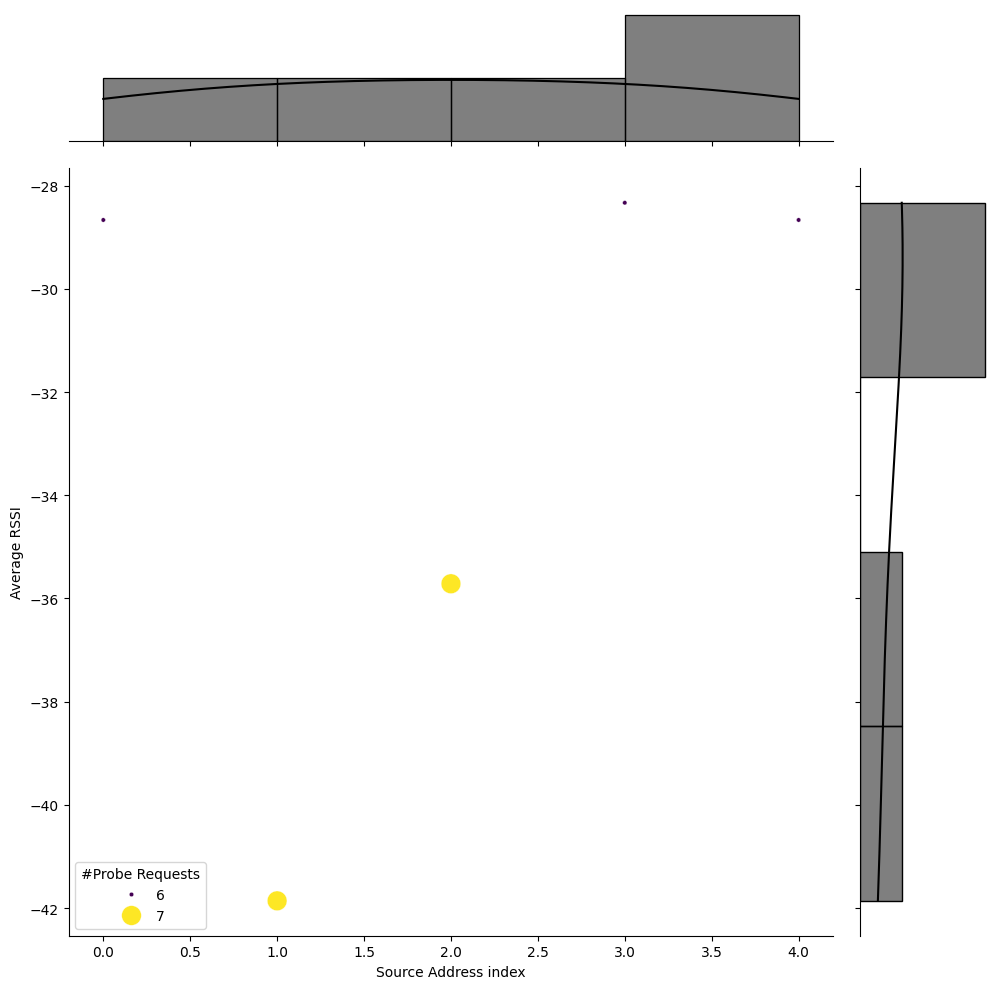

In [ ]:
g = sns.jointplot(x="Source Address index", y="Average RSSI", data=df_rssi_probe_iat, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color='k', height = 10)
g.ax_joint.cla()

sns.scatterplot(data=df_rssi_probe_iat, x='Source Address index', y='Average RSSI', size='#Probe Requests',
                hue='#Probe Requests', palette=sns.color_palette("viridis", as_cmap=True), sizes=(10, 200),
                ax=g.ax_joint)

plt.show()